In [1]:
import torch
from pathlib import Path
import matplotlib.pyplot as plt
plt.style.use('../support/plot_style.txt')

In [2]:
pdf_dir = Path('./pdfs')
pdf_dir.mkdir(exist_ok=True,parents=True)

## Load data

This notebook assumes you ran the notebooks in Figure_3 and Figure_4 to compute the statistics that we visalize herein. 

In [3]:
correlations = torch.load('../Figure_3/calc_results/insulation_score_correlations.pt',map_location='cpu')
correlations.update(
    torch.load('../Figure_4/temp_data/insulation_score_correlations.pt',map_location='cpu')
)

## Combine data from the different chromosomes for each set of correlations

In [4]:
dipc_corrs = []
cgen_gm_corrs = []
cgen_imr_corrs = []

for chrom in range(1,23):
    chrom = str(chrom)
    dipc_corrs+= list(correlations['Dip-C'][chrom].values())
    cgen_gm_corrs+= list(correlations['GM12878'][chrom].values())
    cgen_imr_corrs+= list(correlations['IMR-90'][chrom].values())

dipc_corrs = torch.tensor(dipc_corrs)
cgen_gm_corrs = torch.tensor(cgen_gm_corrs)
cgen_imr_corrs = torch.tensor(cgen_imr_corrs)

dipc_corrs = dipc_corrs[dipc_corrs.isfinite()].numpy()
cgen_gm_corrs = cgen_gm_corrs[cgen_gm_corrs.isfinite()].numpy()
cgen_imr_corrs = cgen_imr_corrs[cgen_imr_corrs.isfinite()].numpy()

## Choose consistent bins

In [5]:
nbins = 65
bins = torch.arange(-1,1.01,2/nbins).numpy()

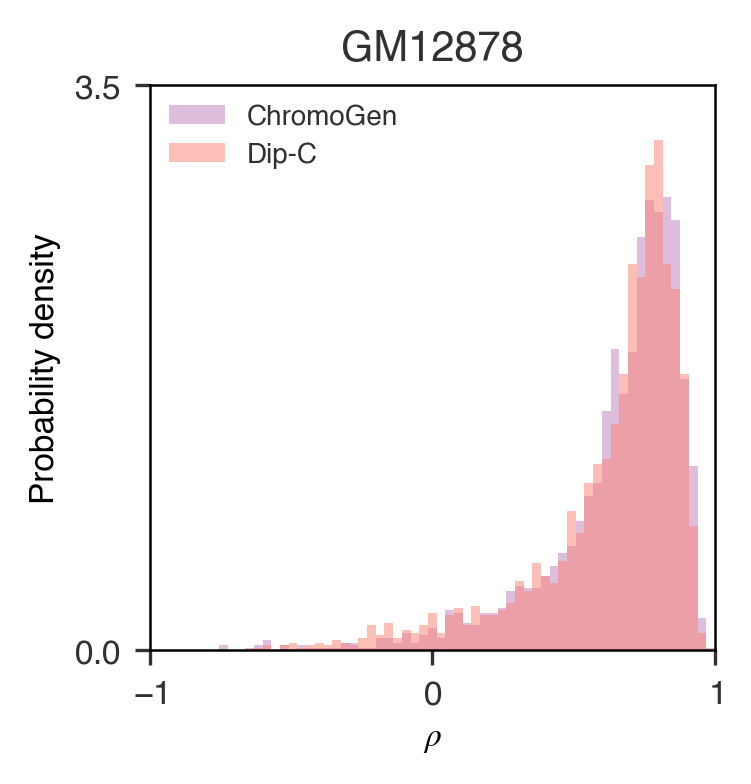

In [6]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(2.5,2.5),layout='constrained')
nbins = 50

ymax = 3.5

#minn = min( cgen_gm_corrs.min(), dipc_corrs.min()  )
#maxx = max( cgen_gm_corrs.max(), dipc_corrs.max()  )
#delta = (maxx - minn)/nbins
#bins = torch.arange(minn,maxx+delta/2,delta)

for pcc,label in [(cgen_gm_corrs,'ChromoGen'),(dipc_corrs,'Dip-C')]:

    ax.hist(pcc,density=True,label=label,bins=bins,alpha=.5,edgecolor='none')

ax.legend(framealpha=0,fontsize='small',loc='upper left')
ax.set_xlim([-1,1])
ax.set_xticks([-1,0,1])
ax.set_ylim([0,ymax])
ax.set_yticks([0,ymax])
ax.set_aspect(2/ymax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Probability density')
ax.set_title('GM12878')

fig.savefig(pdf_dir/'histogram.pdf')

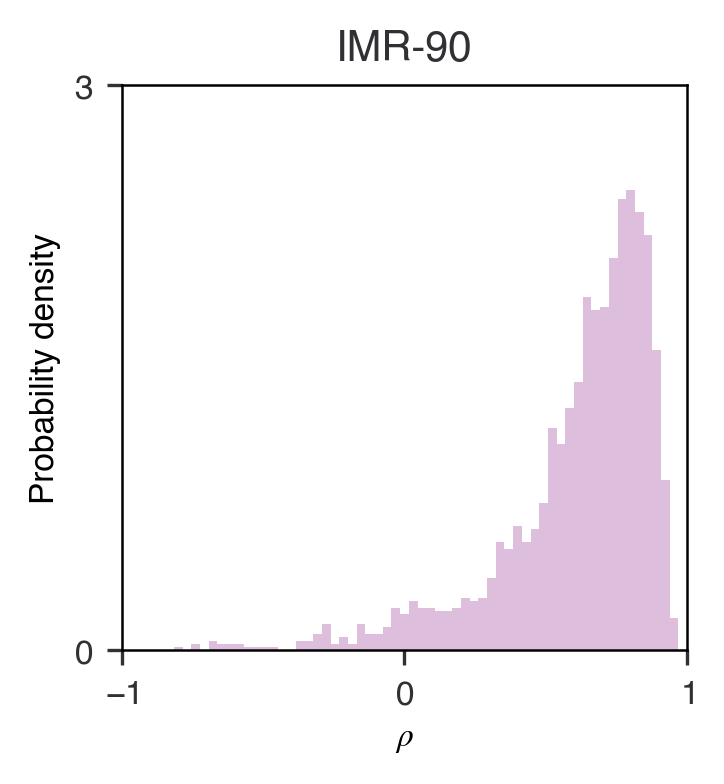

In [7]:
fig,ax = plt.subplots(ncols=1,nrows=1,figsize=(2.5,2.5),layout='constrained')
nbins = 50

ymax = 3
#minn = cgen_imr_corrs.min()
#maxx = cgen_imr_corrs.max()
#delta = (maxx - minn)/nbins
#bins = torch.arange(minn,maxx+delta/2,delta)

for pcc,label in [(cgen_imr_corrs,'')]:

    ax.hist(pcc,density=True,label=label,bins=bins,alpha=.5,edgecolor='none')

ax.set_xlim([-1,1])
ax.set_xticks([-1,0,1])
ax.set_ylim([0,ymax])
ax.set_yticks([0,ymax])
ax.set_aspect(2/ymax)
ax.set_xlabel('$\\rho$')
ax.set_ylabel('Probability density')
ax.set_title('IMR-90')

fig.savefig(pdf_dir/'histogram_imr.pdf')

Figures resized and placed next to each other in Adobe Illustrator